# MLE Performance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import qutip as qt
import qsttoolkit as qst
import tensorflow as tf
import logging
import time

## Data Preparation

In [2]:
Nc = 32
Nd = 20
xgrid = np.linspace(-5, 5, Nd)
pgrid = np.linspace(-5, 5, Nd)

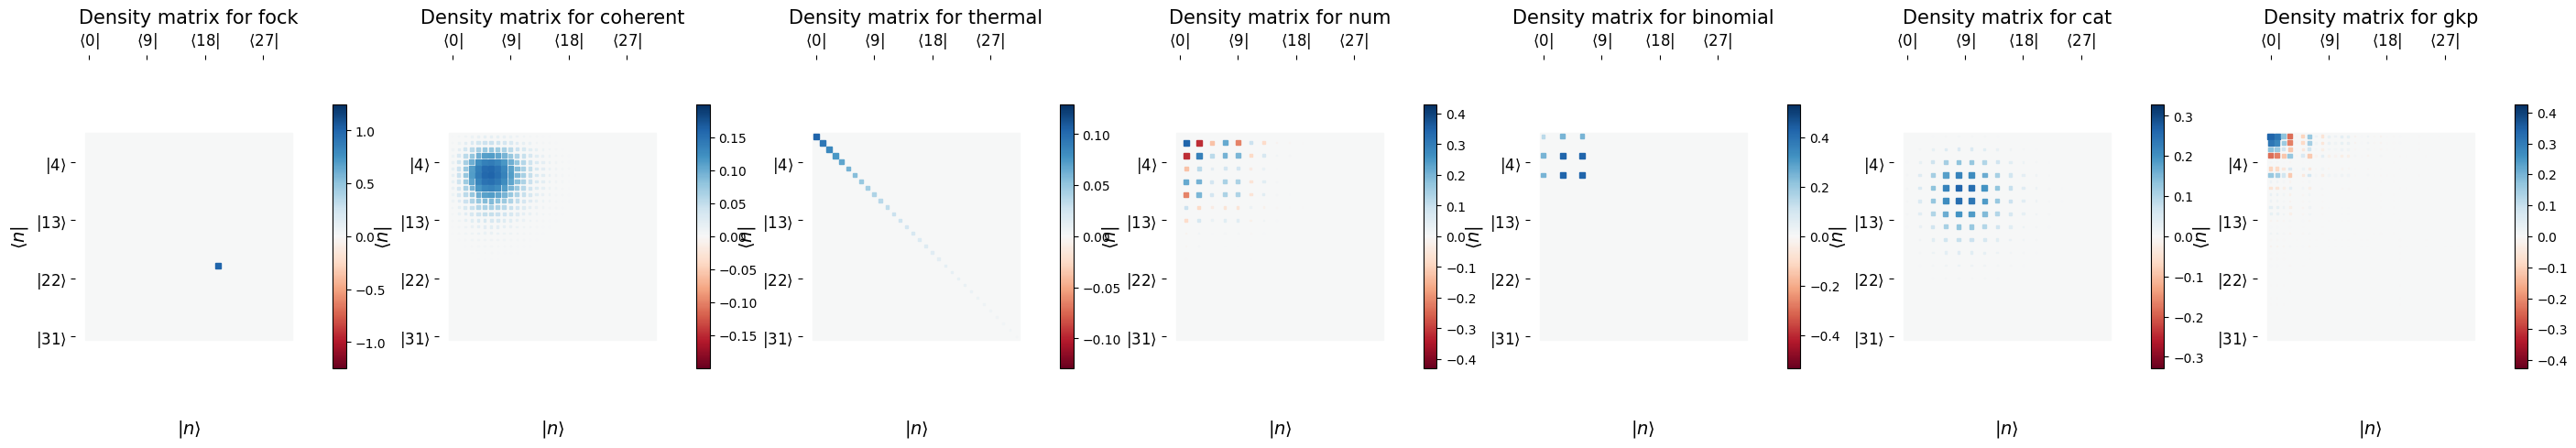

In [3]:
fock_test = qt.fock_dm(Nc, 20)
coherent_test = qt.coherent_dm(Nc, 2.5)
thermal_test = qt.thermal_dm(Nc, 9)
num_test = qt.ket2dm(qst.data.num_state('M2', Nc))
binomial_test = qt.ket2dm(qst.data.binomial_state(Nc, 2, 2, 1))
cat_test = qt.ket2dm(qst.data.cat_state(Nc, 3))
gkp_test = qt.ket2dm(qst.data.gkp_state(Nc, [-5, 5], [-5, 5], 0.5, 4.5))

fig, ax = plt.subplots(1, 7, figsize=(35, 5))
qst.plot_Hinton(fock_test, ax=ax[0], label='fock')
qst.plot_Hinton(coherent_test, ax=ax[1], label='coherent')
qst.plot_Hinton(thermal_test, ax=ax[2], label='thermal')
qst.plot_Hinton(num_test, ax=ax[3], label='num')
qst.plot_Hinton(binomial_test, ax=ax[4], label='binomial')
qst.plot_Hinton(cat_test, ax=ax[5], label='cat')
qst.plot_Hinton(gkp_test, ax=ax[6], label='gkp')
plt.show()

## Average Fidelity

In [4]:
measurement_operators = qst.tomography.measurement_operators(Nc, 'Husimi_Q', xgrid=xgrid, pgrid=pgrid)

In [5]:
test_state = qst.mixed_state_noise(num_test, 0.2).full()
measurement_data = qst.expectation(test_state, measurement_operators).numpy().reshape(1, Nd**2)

MLE1 = qst.MLEQuantumStateTomography()
MLE2 = qst.MLEQuantumStateTomography()
MLE3 = qst.MLEQuantumStateTomography()
MLE4 = qst.MLEQuantumStateTomography()
MLE5 = qst.MLEQuantumStateTomography()
models = [MLE1, MLE2, MLE3, MLE4, MLE5]

In [6]:
epochs = 10000
runs = 5

Epoch 0/10000, Loss: 41.60619002964574, Fidelity: 0.16746285228111984
Epoch 500/10000, Loss: 32.70794899311002, Fidelity: 0.7630217777641568
Epoch 1000/10000, Loss: 32.678066128779875, Fidelity: 0.7862525654933357
Epoch 1500/10000, Loss: 32.662264461623366, Fidelity: 0.7933826259541704
Epoch 2000/10000, Loss: 32.65192790417687, Fidelity: 0.7960780599861236
Epoch 2500/10000, Loss: 32.64505517600384, Fidelity: 0.796782227512047
Epoch 3000/10000, Loss: 32.640000591100886, Fidelity: 0.7968505413466519
Epoch 3500/10000, Loss: 32.635970895287954, Fidelity: 0.7964169924693303
Epoch 4000/10000, Loss: 32.632854874275836, Fidelity: 0.7957368109278161
Epoch 4500/10000, Loss: 32.63009836809942, Fidelity: 0.7948442720407801
Epoch 5000/10000, Loss: 32.62761900046023, Fidelity: 0.7938563186953354
Epoch 5500/10000, Loss: 32.62528205851575, Fidelity: 0.7926585009951711
Epoch 6000/10000, Loss: 32.62325295995717, Fidelity: 0.7914207117809736
Epoch 6500/10000, Loss: 32.62165870616537, Fidelity: 0.79019797

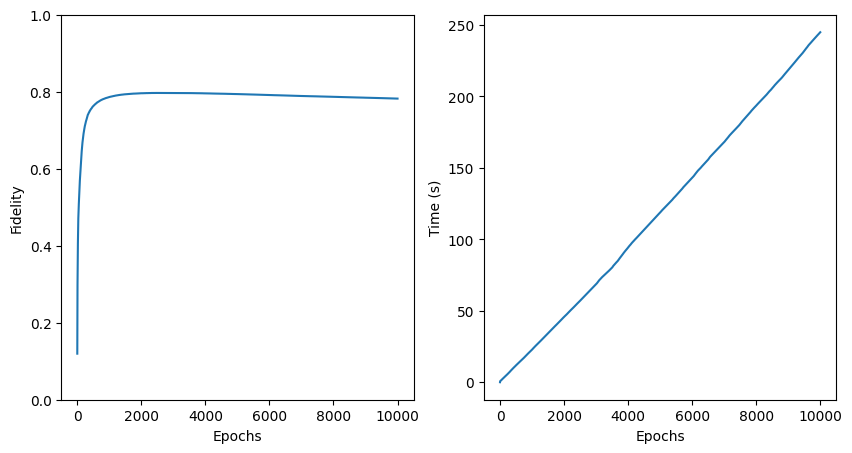

Run 1 time: 4.113889825344086 minutes, estimated time to completion: 0.2742593216896057 hours
Epoch 0/10000, Loss: 41.722239280382794, Fidelity: 0.23604248538162276
Epoch 500/10000, Loss: 32.63351953038841, Fidelity: 0.689837214206707
Epoch 1000/10000, Loss: 32.63098018623356, Fidelity: 0.7378953724446738
Epoch 1500/10000, Loss: 32.66964433393492, Fidelity: 0.754771023589955
Epoch 2000/10000, Loss: 32.6623871053319, Fidelity: 0.7614525995684623
Epoch 2500/10000, Loss: 32.654295901241994, Fidelity: 0.765383362318875
Epoch 3000/10000, Loss: 32.647460394668805, Fidelity: 0.7681968108232379
Epoch 3500/10000, Loss: 32.64182581875052, Fidelity: 0.7703068216200735
Epoch 4000/10000, Loss: 32.63722681855526, Fidelity: 0.7718521073155876
Epoch 4500/10000, Loss: 32.63326553529545, Fidelity: 0.7730152111854116
Epoch 5000/10000, Loss: 32.62995516894195, Fidelity: 0.7739543772364356
Epoch 5500/10000, Loss: 32.62728429298052, Fidelity: 0.7747013143983418
Epoch 6000/10000, Loss: 32.62497392122694, Fid

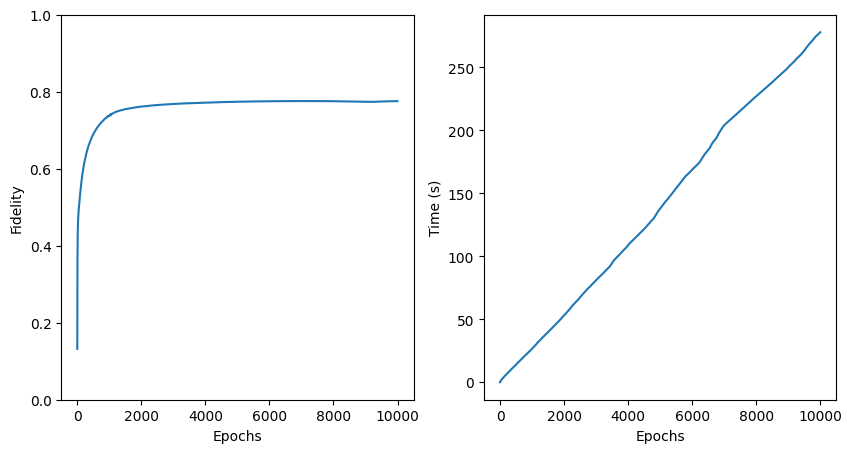

Run 2 time: 4.652340757846832 minutes, estimated time to completion: 0.23261703789234162 hours
Epoch 0/10000, Loss: 41.54866429091294, Fidelity: 0.23176623810702782
Epoch 500/10000, Loss: 32.72317804288102, Fidelity: 0.6456609446579261
Epoch 1000/10000, Loss: 32.68903321277494, Fidelity: 0.6968050526418492
Epoch 1500/10000, Loss: 32.67363039512992, Fidelity: 0.7213528627409694
Epoch 2000/10000, Loss: 32.66307915878663, Fidelity: 0.7358306592002383
Epoch 2500/10000, Loss: 32.65517346346641, Fidelity: 0.745885973523872
Epoch 3000/10000, Loss: 32.64898512601947, Fidelity: 0.7531982772019468
Epoch 3500/10000, Loss: 32.64388062218513, Fidelity: 0.7587924661366569
Epoch 4000/10000, Loss: 32.63960455132006, Fidelity: 0.7633250271401166
Epoch 4500/10000, Loss: 32.63596564685406, Fidelity: 0.7669052996474305
Epoch 5000/10000, Loss: 32.63287850555389, Fidelity: 0.769799375048586
Epoch 5500/10000, Loss: 32.630154842474596, Fidelity: 0.7723521615817865
Epoch 6000/10000, Loss: 32.62773737735892, Fi

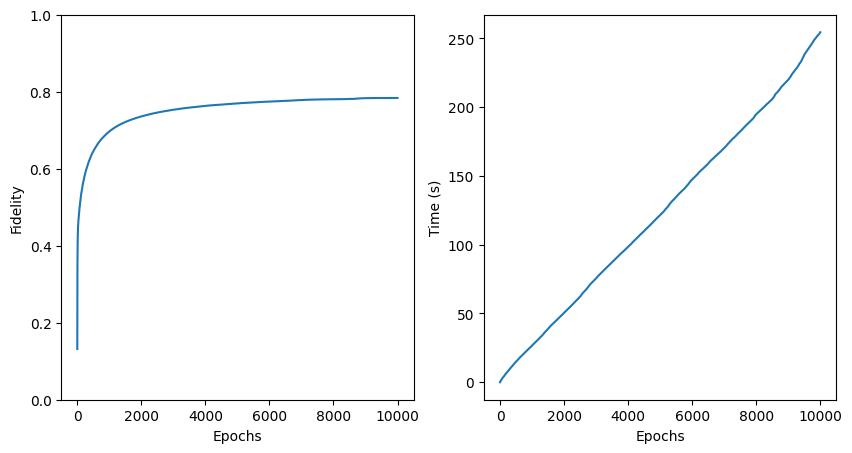

Run 3 time: 4.271685612201691 minutes, estimated time to completion: 0.14238952040672304 hours
Epoch 0/10000, Loss: 41.54648678003734, Fidelity: 0.236786770571651
Epoch 500/10000, Loss: 32.810616973387454, Fidelity: 0.6537429157446604
Epoch 1000/10000, Loss: 32.75955195833145, Fidelity: 0.6978120386407145
Epoch 1500/10000, Loss: 32.728417943376115, Fidelity: 0.7202049209153292
Epoch 2000/10000, Loss: 32.70688026975242, Fidelity: 0.7338110960697689
Epoch 2500/10000, Loss: 32.6913131313511, Fidelity: 0.7436037735726824
Epoch 3000/10000, Loss: 32.67941905825895, Fidelity: 0.7512364579082362
Epoch 3500/10000, Loss: 32.67045707497044, Fidelity: 0.7571511156191894
Epoch 4000/10000, Loss: 32.6631702848481, Fidelity: 0.761846908449437
Epoch 4500/10000, Loss: 32.65706734600688, Fidelity: 0.7653424504762704
Epoch 5000/10000, Loss: 32.65177260078232, Fidelity: 0.768505092494438
Epoch 5500/10000, Loss: 32.64716008611704, Fidelity: 0.7708020794110207
Epoch 6000/10000, Loss: 32.643058609938365, Fide

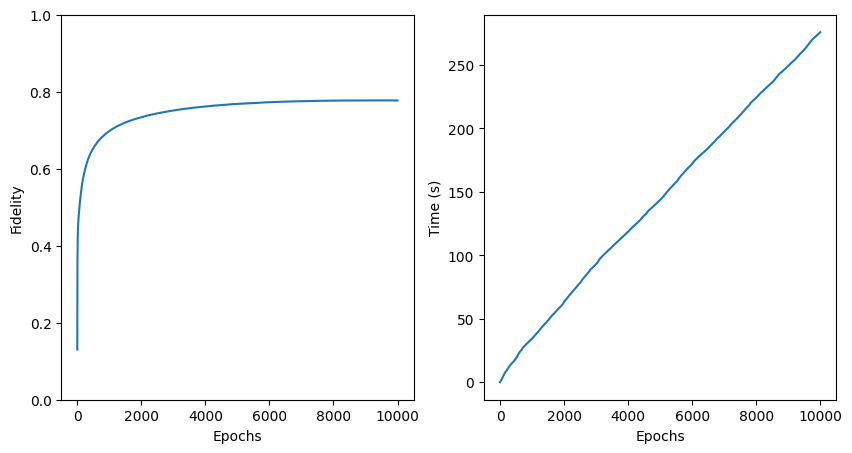

Run 4 time: 4.62521718343099 minutes, estimated time to completion: 0.07708695305718316 hours
Epoch 0/10000, Loss: 41.91522769525351, Fidelity: 0.20432868639032528
Epoch 500/10000, Loss: 32.76405610442688, Fidelity: 0.6176404087819938
Epoch 1000/10000, Loss: 32.720609908368765, Fidelity: 0.6779491119023655
Epoch 1500/10000, Loss: 32.69908533190143, Fidelity: 0.7078278490977344
Epoch 2000/10000, Loss: 32.68412525599737, Fidelity: 0.726044256187979
Epoch 2500/10000, Loss: 32.67317112116308, Fidelity: 0.738136619764489
Epoch 3000/10000, Loss: 32.66462554761649, Fidelity: 0.7468421566585612
Epoch 3500/10000, Loss: 32.657592847636565, Fidelity: 0.7534061122789971
Epoch 4000/10000, Loss: 32.651672417141285, Fidelity: 0.7584661531343871
Epoch 4500/10000, Loss: 32.64629545014337, Fidelity: 0.7624814226437844
Epoch 5000/10000, Loss: 32.64171288109195, Fidelity: 0.7657975010770454
Epoch 5500/10000, Loss: 32.637693064104724, Fidelity: 0.7684678713967844
Epoch 6000/10000, Loss: 32.63405236092052, 

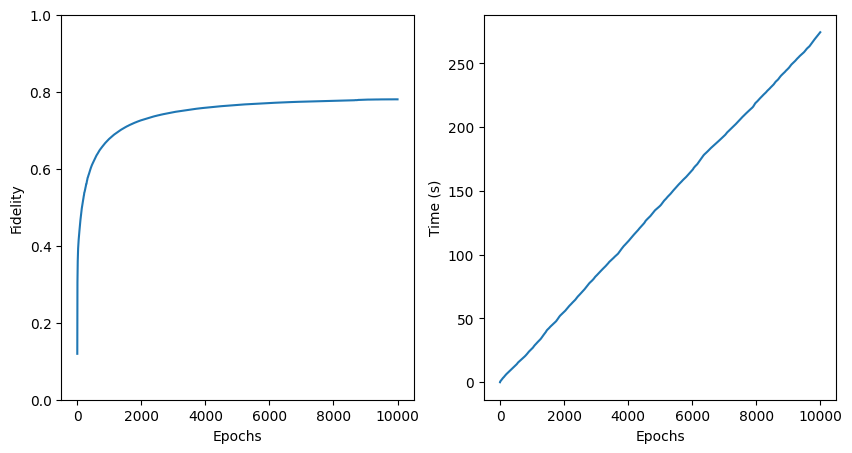

Run 5 time: 4.594623676935831 minutes, estimated time to completion: 0.0 hours


In [7]:
tf.get_logger().setLevel(logging.ERROR)

results = pd.DataFrame({'epochs': range(0, epochs+1)})

for run in range(runs):
    loop_start_time = time.time()
    tf.keras.backend.clear_session()

    fidelities = []
    times = []

    initial_dm = qst.random_positive_semidefinite_dm(Nc).full()
    fidelities.append(qst.fidelity(test_state, initial_dm))
    times.append(0.0)

    model = models[run]
    model.reconstruct(measurement_data,
                      measurement_operators,
                      initial_dm=initial_dm,
                      epochs=epochs,
                      verbose_interval=500,
                      true_dm=test_state,
                      time_log_interval=1)

    fidelities.extend(model.fidelities)
    times.extend(model.times)

    results[f'num_fidelities_{run}'] = fidelities
    results[f'num_times_{run}'] = times
    
    _, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].plot(results['epochs'], fidelities)
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Fidelity')
    axs[0].set_ylim([0, 1])
    axs[1].plot(results['epochs'], times)
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Time (s)') 
    plt.show()
    results.to_csv('MLE_num_fidelities.csv')
    print(f"Run {run+1} time: {(time.time() - loop_start_time)/60} minutes, estimated time to completion: {(time.time() - loop_start_time) * (runs - run - 1) / 3600} hours")

In [8]:
results.to_csv('MLE_num_fidelities.csv')

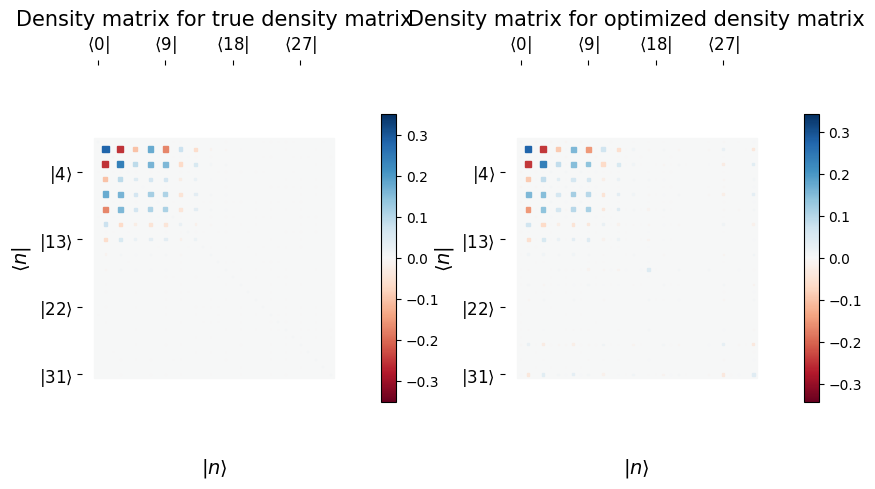

In [9]:
MLE5.plot_comparison_hintons(test_state)

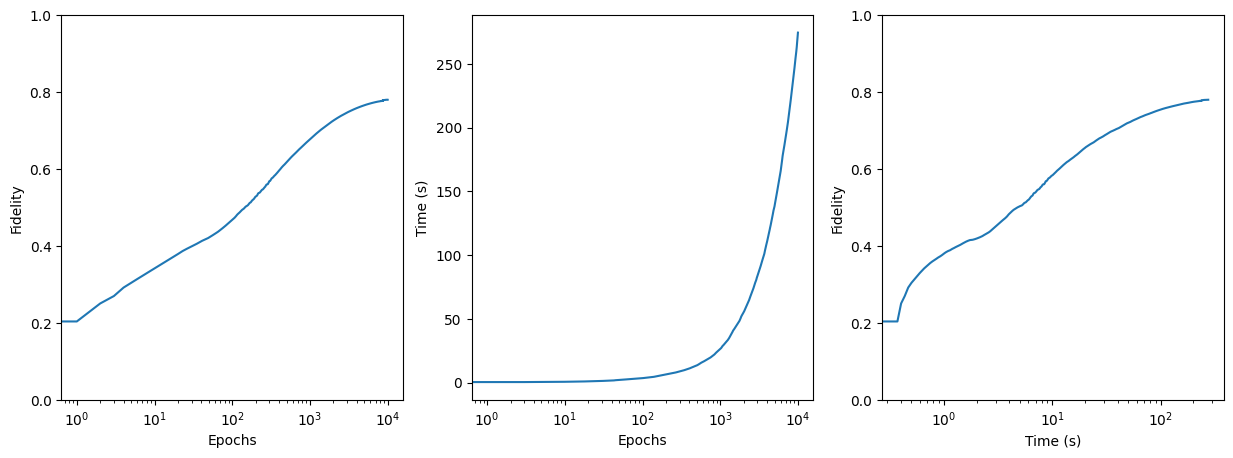

In [10]:
_, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(results['epochs'], fidelities)
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Fidelity')
axs[0].set_ylim([0, 1])
axs[0].set_xscale('log')

axs[1].plot(results['epochs'], times)
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Time (s)') 
axs[1].set_xscale('log')

axs[2].plot(times, fidelities)
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Fidelity')
axs[2].set_ylim([0, 1])
axs[2].set_xscale('log')

plt.show()